## Preparing Data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from collections import Counter

In [4]:
#reading the csv file
stackoverflow=pd.read_csv('./data/survey_results_public.csv')

In [5]:
#Inspecting first 5 rows
stackoverflow.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
stackoverflow.describe

<bound method NDFrame.describe of        Respondent                                       Professional  \
0               1                                            Student   
1               2                                            Student   
2               3                             Professional developer   
3               4  Professional non-developer who sometimes write...   
4               5                             Professional developer   
...           ...                                                ...   
51387       51388                             Professional developer   
51388       51389                                            Student   
51389       51390                             Professional developer   
51390       51391                             Professional developer   
51391       51392  Professional non-developer who sometimes write...   

                    ProgramHobby         Country      University  \
0                      Yes, both 

## Handing Missing Values

In [7]:
#Missing value sum of particular columns
stackoverflow.isna().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [8]:
#We are not droping it as there is large percentage of missing values in our data set
#We are not taking the mean as their is categorical values which we  can't take the mean
stackoverflow.fillna(method='ffill', inplace=True)
stackoverflow.fillna(method='bfill', inplace=True)

In [9]:
stackoverflow.isna().sum()

Respondent              0
Professional            0
ProgramHobby            0
Country                 0
University              0
                       ..
QuestionsInteresting    0
QuestionsConfusing      0
InterestedAnswers       0
Salary                  0
ExpectedSalary          0
Length: 154, dtype: int64

## Data Understanding

In [10]:
#All the Columns in the dataframe
list(stackoverflow.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [11]:
#dimensiom of the dataframe which is 51392 rows and 154 columns
stackoverflow.shape

(51392, 154)

In [12]:
#reading the csv file where it explains each columns in details
schema=pd.read_csv('./data/survey_results_schema.csv')

In [13]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


## Evaluating Results and Business Understanding

## Question 1
### What programming language do programmers most want to use?

In [14]:
stackoverflow["WantWorkLanguage"]

0                                                    Swift
1                                  Java; Python; Ruby; SQL
2                                          C; Python; Rust
3                                   Matlab; Python; R; SQL
4                                   Matlab; Python; R; SQL
                               ...                        
51387    C#; Python; R; Ruby; Rust; Scala; TypeScript; ...
51388    C#; Java; JavaScript; PHP; Python; Ruby; SQL; ...
51389    C#; Java; JavaScript; PHP; Python; Ruby; SQL; ...
51390                             Clojure; Erlang; Haskell
51391                             Clojure; Erlang; Haskell
Name: WantWorkLanguage, Length: 51392, dtype: object

In [15]:
stackoverflow["WantWorkLanguage"][1]

'Java; Python; Ruby; SQL'

In [16]:
lst_language = stackoverflow["WantWorkLanguage"].apply(lambda x: x.split("; "))

In [17]:
lst_language_reduce = reduce(lambda x,y: x+y, lst_language, [])

In [18]:
langs = Counter(lst_language_reduce).keys()
values = Counter(lst_language_reduce).values()

In [19]:
zip_lst = sorted(zip(list(langs), list(values)), key=lambda x: x[1], reverse=True) 

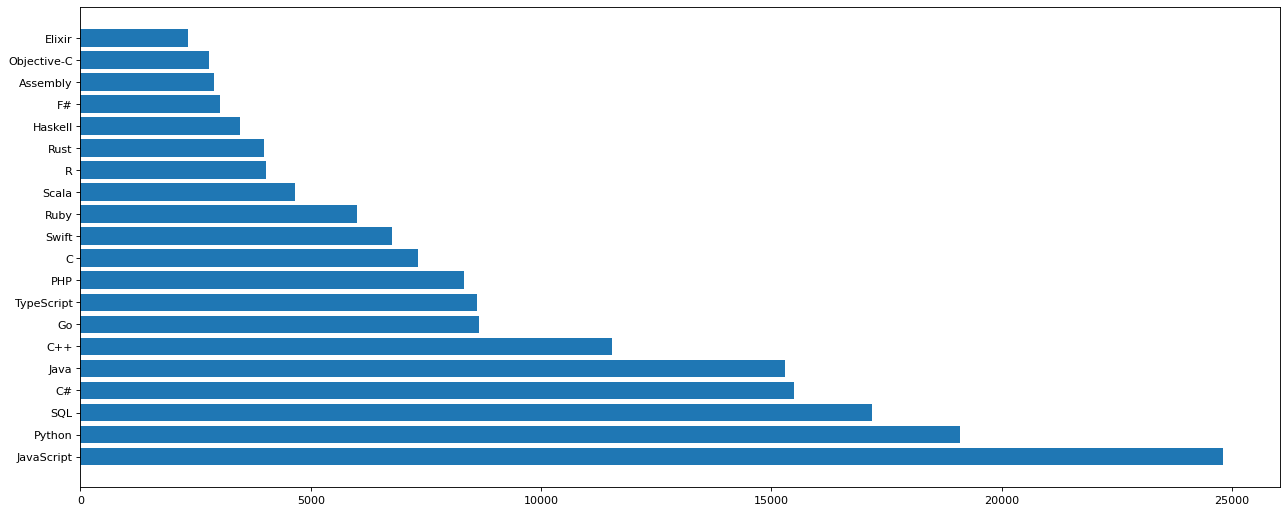

In [20]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
langs, values = zip(*zip_lst)
ax.barh(langs[:20],values[:20])
plt.show()

##### Result :
Based on the chart above, it can be seen that JavaScript and Python are much more popular than the rest of the programming languages

## Question 2
### Which company size and company type have highest salary?

In [21]:
#Number of company of particular company size
particular = stackoverflow['CompanySize'].value_counts()
particular

20 to 99 employees          11343
100 to 499 employees         9498
10,000 or more employees     7558
10 to 19 employees           5437
1,000 to 4,999 employees     5060
Fewer than 10 employees      5029
500 to 999 employees         3307
5,000 to 9,999 employees     2141
I don't know                 1121
I prefer not to answer        898
Name: CompanySize, dtype: int64

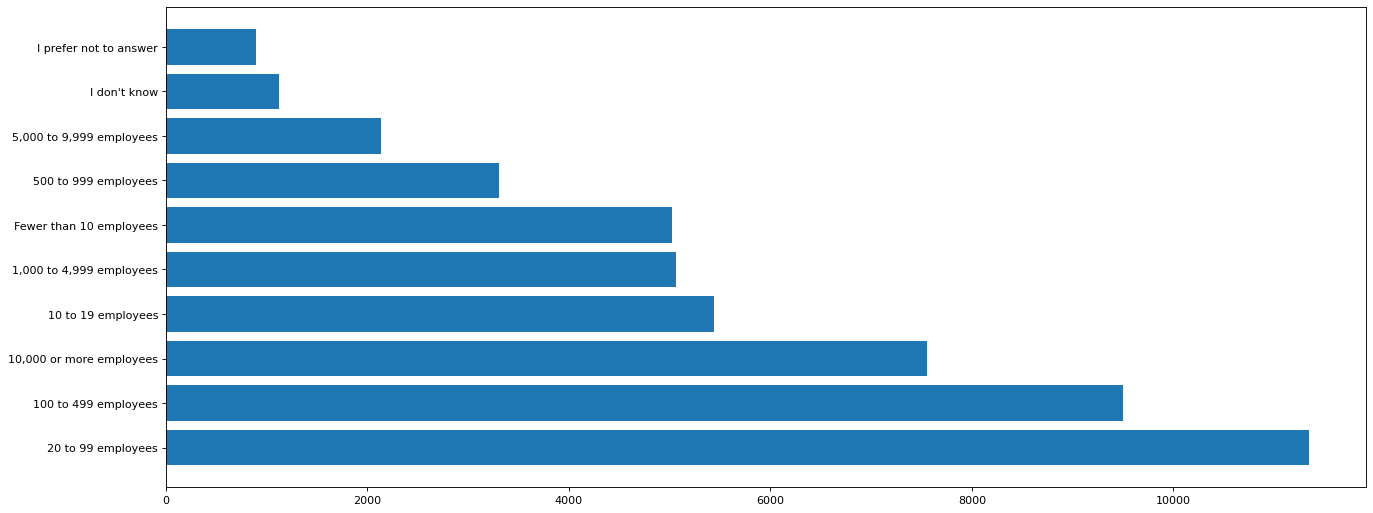

In [22]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
keys = list(particular.keys())
values = list(particular.values)
ax.barh(keys,values)
plt.show()

In [23]:
#Number of companyType
company_type = stackoverflow['CompanyType'].value_counts()
company_type

Privately-held limited company, not in startup mode                      22104
Publicly-traded corporation                                               7793
I don't know                                                              4246
Sole proprietorship or partnership, not in startup mode                   3715
Government agency or public school/university                             3244
Venture-funded startup                                                    3158
I prefer not to answer                                                    2417
Pre-series A startup                                                      1699
Non-profit/non-governmental organization or private school/university     1649
State-owned company                                                        893
Something else                                                             474
Name: CompanyType, dtype: int64

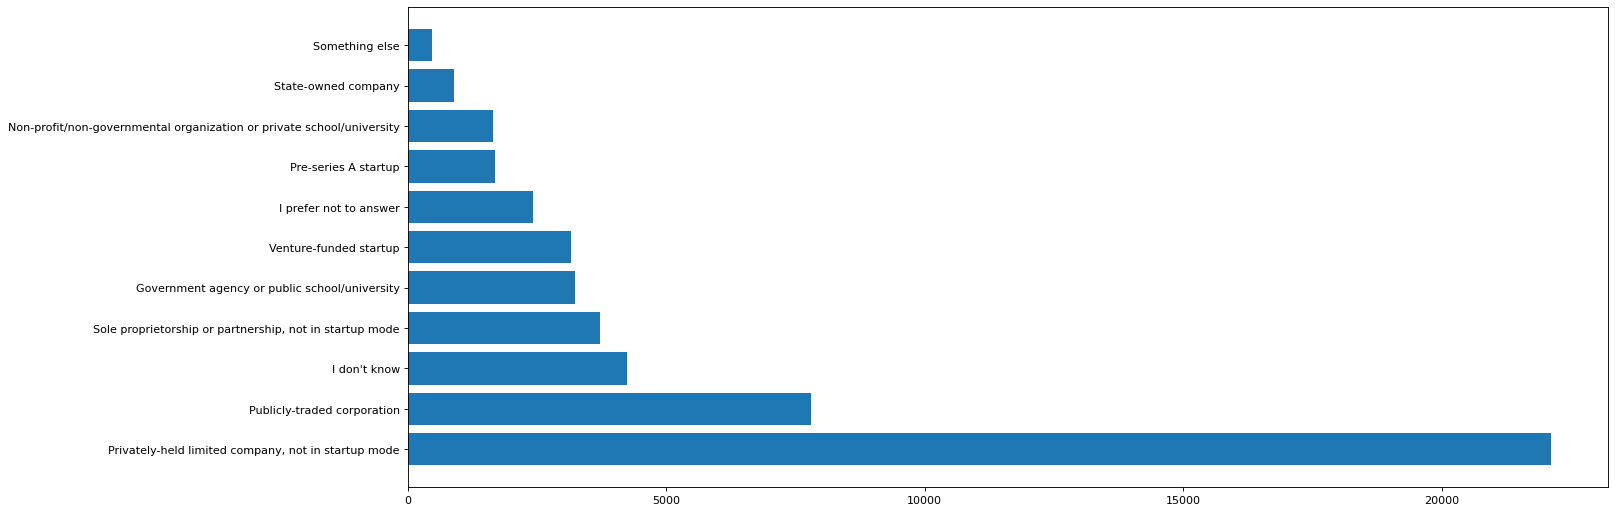

In [24]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
keys = list(company_type.keys())
values = list(company_type.values)
ax.barh(keys,values)
plt.show()

In [25]:
#Average salary of company size and company type
stackoverflow.groupby(['CompanySize','CompanyType'])['Salary'].mean().sort_values(ascending=False)

CompanySize               CompanyType           
5,000 to 9,999 employees  Venture-funded startup    96671.383302
1,000 to 4,999 employees  Pre-series A startup      82038.530466
                          Venture-funded startup    81739.797369
I prefer not to answer    Pre-series A startup      81050.000328
                          Venture-funded startup    76789.896588
                                                        ...     
500 to 999 employees      Pre-series A startup      39328.673835
I don't know              State-owned company       34957.686269
I prefer not to answer    State-owned company       22949.330478
I don't know              Pre-series A startup      16907.518383
                          Venture-funded startup    14680.193361
Name: Salary, Length: 110, dtype: float64

In [26]:
#Grouping Company Type and Company size and finding average salary in descending order
stackoverflow.groupby(['CompanyType','CompanySize'])['Salary'].mean().sort_values(ascending=False) 

CompanyType             CompanySize             
Venture-funded startup  5,000 to 9,999 employees    96671.383302
Pre-series A startup    1,000 to 4,999 employees    82038.530466
Venture-funded startup  1,000 to 4,999 employees    81739.797369
Pre-series A startup    I prefer not to answer      81050.000328
Venture-funded startup  I prefer not to answer      76789.896588
                                                        ...     
Pre-series A startup    500 to 999 employees        39328.673835
State-owned company     I don't know                34957.686269
                        I prefer not to answer      22949.330478
Pre-series A startup    I don't know                16907.518383
Venture-funded startup  I don't know                14680.193361
Name: Salary, Length: 110, dtype: float64

#### Result :
Pre-series A startup have the highest average salary among company type.

In Venture-funded startup , 5,000 to 9,999 employees have the highest average salary among company size.

## Question 3

### How is the average salary of female developers compared to male developers?

In [41]:
df = stackoverflow[["Gender", "Salary"]]

In [42]:
df

,Gender,Salary
0,Male,113750.0
1,Male,113750.0
2,Male,113750.0
3,Male,113750.0
4,Male,113750.0
...,...,...
51387,Male,58000.0
51388,Male,58000.0
51389,Male,58000.0
51390,Male,40000.0


In [45]:
df[df["Gender"]=="Female"].mean()

/var/folders/xt/tzz456n920l1l0lpq0t5z08m0000gn/T/ipykernel_70099/374692395.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Gender"]=="Female"].mean()


Salary    55293.281614
dtype: float64

In [48]:
df[df["Gender"]=="Male"].mean()

/var/folders/xt/tzz456n920l1l0lpq0t5z08m0000gn/T/ipykernel_70099/3810433270.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Gender"]=="Male"].mean()


Salary    54267.534081
dtype: float64

/var/folders/xt/tzz456n920l1l0lpq0t5z08m0000gn/T/ipykernel_70099/3335023367.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  values = [int(df[df["Gender"]=="Male"].mean()), int(df[df["Gender"]=="Female"].mean())]


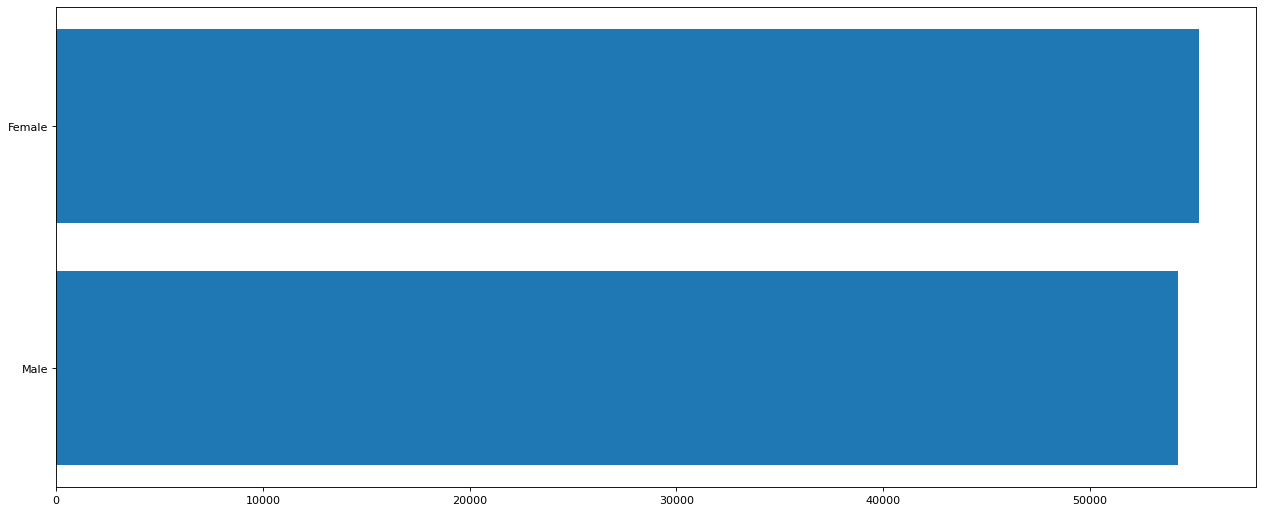

In [53]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
keys = ["Male", "Female"]
values = [int(df[df["Gender"]=="Male"].mean()), int(df[df["Gender"]=="Female"].mean())]
ax.barh(keys,values)
plt.show()

#### Result:
That shows that the salary is not dependent on gender.